In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih data customer_churn.csv

In [3]:
customer = pd.read_csv('customer_churn.csv')
customer.head()

,customer_id,age,balance,job_type,marital_status,education_level,contact_type,num_transactions,avg_transaction_value,churn
0,1,56,2020,blue_collar,single,secondary,phone,15,46.22,1
1,2,69,7917,entrepreneur,single,secondary,email,35,209.50,0
2,3,46,11783,white_collar,single,tertiary,email,7,175.29,1
3,4,32,11436,blue_collar,divorced,tertiary,email,29,394.74,0
4,5,60,15696,blue_collar,divorced,secondary,sms,44,211.04,0


# Cek anomali data

In [6]:
# cek missing value
print(customer.isnull().sum())

customer_id              0
age                      0
balance                  0
job_type                 0
marital_status           0
education_level          0
contact_type             0
num_transactions         0
avg_transaction_value    0
churn                    0
dtype: int64


In [ ]:
# cek duplikasi
print(customer.duplicated().sum())

0


In [ ]:
print(customer.describe())

print(customer.describe(include='object').reset_index())

       customer_id          age       balance  num_transactions  \
count  5000.000000  5000.000000   5000.000000       5000.000000   
mean   2500.500000    43.584600   9992.816000         24.826400   
std    1443.520003    14.919094   5754.380535         13.951028   
min       1.000000    18.000000    101.000000          1.000000   
25%    1250.750000    31.000000   4968.750000         13.000000   
50%    2500.500000    43.000000  10042.000000         24.000000   
75%    3750.250000    56.000000  14969.250000         37.000000   
max    5000.000000    69.000000  19999.000000         49.000000   

       avg_transaction_value       churn  
count            5000.000000  5000.00000  
mean              253.281298     0.15480  
std               140.246666     0.36175  
min                10.050000     0.00000  
25%               132.720000     0.00000  
50%               254.205000     0.00000  
75%               370.922500     0.00000  
max               499.850000     1.00000  
    index

In [11]:
# Cek nilai maksimum untuk memastikan ada nilai aneh/janggal/anomali
print("Max balance:", customer["balance"].max())
print("Max avg_transaction_value:", customer["avg_transaction_value"].max())

Max balance: 19999
Max avg_transaction_value: 499.85


In [12]:
# Cek distribusi frekuensi balance apakah ada nilai yang sering muncul di titik tertentu.
print(customer["balance"].value_counts().reset_index().head(10))

# tidak ada angka yang mendominasi secara ekstrem.

   balance  count
0    11718      5
1     7482      4
2     5699      4
3    19890      4
4     3229      4
5     5022      3
6    10445      3
7     4667      3
8     8517      3
9     5157      3


In [13]:
# Cek distribusi frekuensi avg_transaction_value
print(customer["avg_transaction_value"].value_counts().reset_index().head(10))

   avg_transaction_value  count
0                 124.17      3
1                 348.23      3
2                 441.65      3
3                 379.72      3
4                 400.79      3
5                 320.90      3
6                 148.89      2
7                 316.17      2
8                  70.42      2
9                  46.22      2


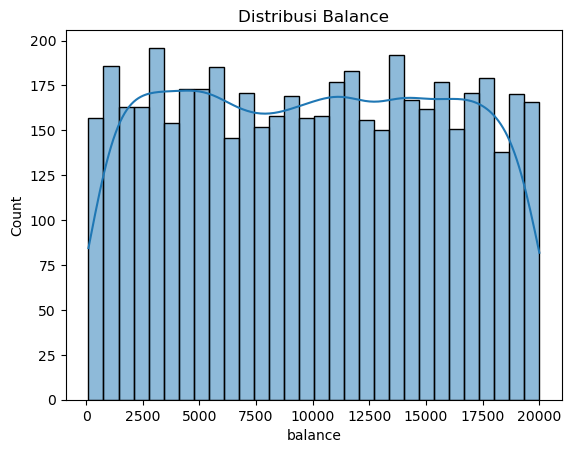

In [ ]:
sns.histplot(customer["balance"], bins=30, kde=True)
plt.title("Distribusi Balance")
plt.show()

# semua data terdistribusi normal, tidak ada yang mencurigakan.

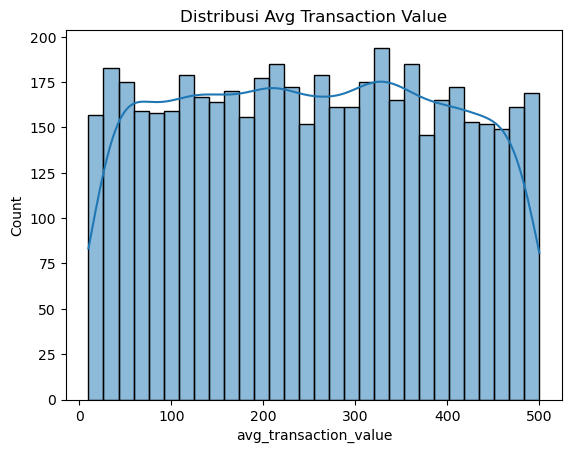

In [ ]:
sns.histplot(customer["avg_transaction_value"], bins=30, kde=True)
plt.title("Distribusi Avg Transaction Value")
plt.show()

# semua data terdistribusi normal, tidak ada yang mencurigakan.

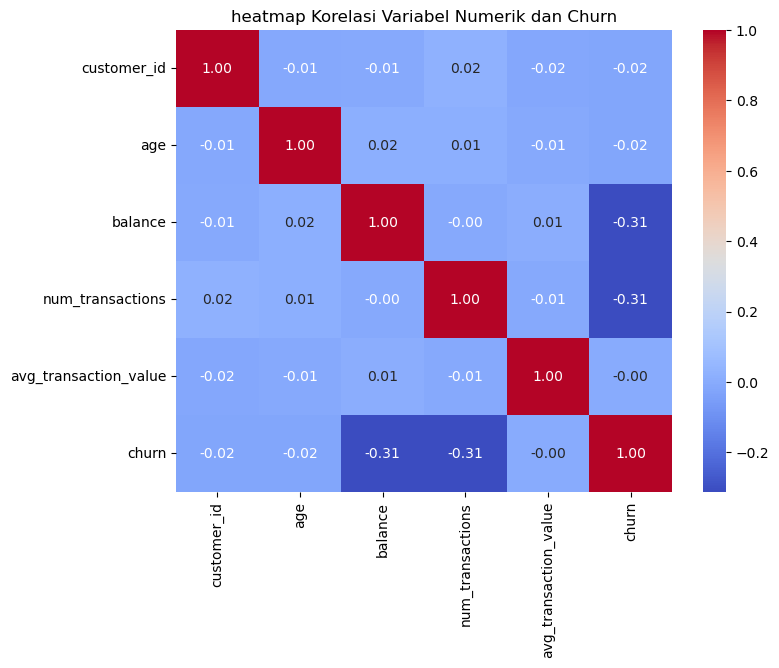

In [ ]:
# Korelasi antar variabel
corr = customer[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('heatmap Korelasi Variabel Numerik dan Churn')
plt.show()


In [24]:
# cek jumlah kategori untuk dan distibusinya
for col in ['job_type', 'marital_status', 'education_level','contact_type']:
    print(f"Kolom: {col}")
    print(customer[col].value_counts().reset_index())
    print("\n")

Kolom: job_type
       job_type  count
0       student   1302
1  entrepreneur   1259
2  white_collar   1234
3   blue_collar   1205


Kolom: marital_status
  marital_status  count
0        married   1676
1       divorced   1675
2         single   1649


Kolom: education_level
  education_level  count
0       secondary   1712
1         primary   1651
2        tertiary   1637


Kolom: contact_type
  contact_type  count
0          sms   1696
1        email   1658
2        phone   1646




# Kesimpulan:
1. Pemeriksaan data:
   - Tidak ada missing value.
   - Tidak ada duplikasi.
   - Terdapat cap (limit sistem) pada nilai maksimum balance (20.000) dan avg_transaction_value (500)
   - Distribusi cukup seragam, kemungkinan data hasil dari simulasi bukan raw data asli.
   - Tidak ada outlier signifikan.
2. Jika data tersebut real, maka harus dicek sumbernya kenapa ada batas 20.000 dan 500 apa karena limit sistem atau memang ada alasan lain.
3. balance dan num_transactions punya korelasi negatif cukup kuat dengan churn (-0.31) = Semakin rendah saldo dan semakin sedikit transaksi, semakin tinggi kemungkinan churn. 
   - Faktor penting churn lebih dipengaruhi oleh saldo & jumlah transaksi dibanding umur atau rata-rata nilai transaksi.
   - Insight: strategi retensi sebaiknya fokus pada nasabah saldo rendah & jarang transaksi.
4. Kolom job_type, marital_status, education_level, contact_type punya distribusi cukup seimbang.
---
Tidak ada masalah pada kualitas data seperti missing value, duplikasi atau outlier signifikan. Distribusi data cukup merata. Korelasi menunjukkan faktor penting yang mempengaruhi churn adalah balance dan num_transactions. Strategi retensi sebaiknya fokus pada nasabah dengan saldo rendah dan jarang transaksi.
